<a href="https://colab.research.google.com/github/zoyayasin/HeartDiseasePrediction/blob/master/HeartDiseaseClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
input_data = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

In [ ]:
input_data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


C= 0.001  Pol= 1  Mean= 0.738  and STD= 0.058
C= 0.01  Pol= 1  Mean= 0.795  and STD= 0.040
C= 0.1  Pol= 1  Mean= 0.816  and STD= 0.043
C= 0.5  Pol= 1  Mean= 0.818  and STD= 0.044
C= 1  Pol= 1  Mean= 0.813  and STD= 0.050
C= 5  Pol= 1  Mean= 0.813  and STD= 0.052
C= 10  Pol= 1  Mean= 0.815  and STD= 0.049


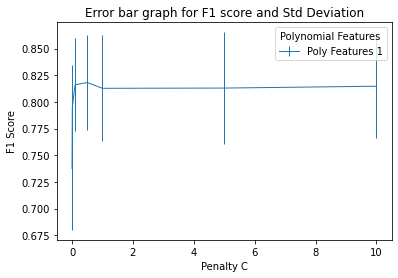

C= 0.001  Pol= 2  Mean= 0.814  and STD= 0.052
C= 0.01  Pol= 2  Mean= 0.812  and STD= 0.049
C= 0.1  Pol= 2  Mean= 0.819  and STD= 0.046
C= 0.5  Pol= 2  Mean= 0.808  and STD= 0.056
C= 1  Pol= 2  Mean= 0.814  and STD= 0.052
C= 5  Pol= 2  Mean= 0.813  and STD= 0.045
C= 10  Pol= 2  Mean= 0.814  and STD= 0.042


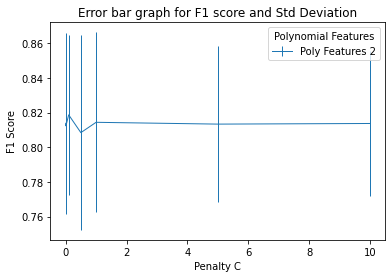

C= 0.001  Pol= 3  Mean= 0.808  and STD= 0.041
C= 0.01  Pol= 3  Mean= 0.808  and STD= 0.043
C= 0.1  Pol= 3  Mean= 0.805  and STD= 0.040
C= 0.5  Pol= 3  Mean= 0.807  and STD= 0.046
C= 1  Pol= 3  Mean= 0.810  and STD= 0.045
C= 5  Pol= 3  Mean= 0.807  and STD= 0.045
C= 10  Pol= 3  Mean= 0.806  and STD= 0.048


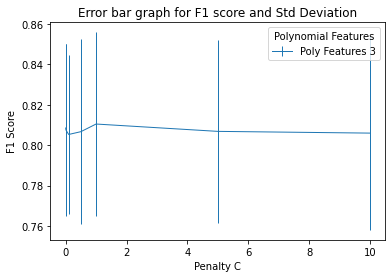

C= 0.001  Pol= 4  Mean= 0.793  and STD= 0.051
C= 0.01  Pol= 4  Mean= 0.805  and STD= 0.045
C= 0.1  Pol= 4  Mean= 0.800  and STD= 0.044
C= 0.5  Pol= 4  Mean= 0.803  and STD= 0.042
C= 1  Pol= 4  Mean= 0.803  and STD= 0.042
C= 5  Pol= 4  Mean= 0.797  and STD= 0.042
C= 10  Pol= 4  Mean= 0.799  and STD= 0.045


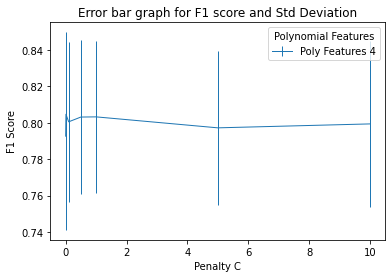

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

#importing data from csv file
df = input_data
X_Train = df.loc[:, df.columns != 'target']
Z=df.iloc[:,-1]


kf = KFold(n_splits=5)
C = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
poly_val = [1,2,3,4]

for q in poly_val:
    temp_poly = [];
    mean_error=[]; std_error=[];
    X_poly_calc = PolynomialFeatures(q).fit_transform(X_Train)
    #looping for graphs at different values of C
    for x in C:
        temp_score=[];
        temp_std=[];
        #applying 5 k-fold cross validation method
        for train, test in kf.split(X_poly_calc):
            model = LogisticRegression(penalty='l2', C=x)
            model.fit(X_poly_calc[train], Z[train])
            Z_pred = model.predict(X_poly_calc[test])
            scores = cross_val_score(model, X_poly_calc, Z, cv=5, scoring='f1')
            temp_score.append(np.array(scores))
        mean_error.append(np.array(temp_score).mean())
        std_error.append(np.array(temp_score).std())
        print('C=',x,' Pol=',q," Mean= %.3f"%np.array(temp_score).mean() , " and STD= %.3f"%np.array(temp_score).std())
        
    #plotting graph for mean square error and standard deviation    
    plt.errorbar(C,mean_error,yerr=std_error,linewidth=1, label='Poly Features %0.0f'%q)
    plt.xlabel('Penalty C'); plt.ylabel('F1 Score')
    plt.title("Error bar graph for F1 score and Std Deviation")
    plt.legend(title='Polynomial Features')
    plt.show()    
    

Dummy Model
[[  0 225]
 [  0 251]]
kNN Model
[[153  72]
 [ 80 171]]
Logistic Regression
[[177  48]
 [ 36 215]]
SVC Model
[[176  49]
 [ 52 199]]


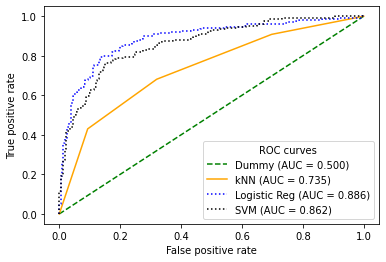

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

#importing data from csv file
df = input_data
X_Train = df.loc[:, df.columns != 'target']
Z=df.iloc[:,-1]

#splitting data between test and train
Xtrain, Xtest, ytrain, ytest = train_test_split(X_Train, Z, test_size=0.4)

#modeling baseline predictor model
print('Dummy Model')
dummy = DummyClassifier(strategy="most_frequent").fit(Xtrain, ytrain)
ydummy = dummy.predict(Xtest)
print(confusion_matrix(ytest, ydummy))

#plotting baseline predictor ROC
dummy_scores = dummy.predict_proba(Xtest)
fpr, tpr, _ = roc_curve(ytest,dummy_scores[:,1])
dummy_auc = roc_auc_score(ytest, dummy_scores[:,1])
plt.plot(fpr,tpr,color='green',linestyle='--', label='Dummy (AUC = %0.3f)'%dummy_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

#modeling kNN classifier
print('kNN Model')
knn = KNeighborsClassifier(n_neighbors=3,weights='uniform').fit(Xtrain, ytrain)
yknn = knn.predict(Xtest)
print(confusion_matrix(ytest, yknn))

#plotting kNN model ROC
knn_scores = knn.predict_proba(Xtest)
fpr, tpr, _ = roc_curve(ytest,knn_scores[:,1])
knn_auc = roc_auc_score(ytest, knn_scores[:,1])
plt.plot(fpr,tpr, color='orange',label='kNN (AUC = %0.3f)'%knn_auc)

#modeling logistic regression 
print('Logistic Regression')
poly = PolynomialFeatures(2)
X_poly_calc = poly.fit_transform(Xtrain)
log = LogisticRegression(penalty='l2', C=0.1).fit(X_poly_calc, ytrain)
X_Test = poly.fit_transform(Xtest)
yLog = log.predict(X_Test)
print(confusion_matrix(ytest, yLog))

#plotting logistic regression ROC
X_poly_test = poly.fit_transform(Xtest)
log_scores = log.predict_proba(X_poly_test)
fpr, tpr, _ = roc_curve(ytest,log_scores[:,1])
log_auc = roc_auc_score(ytest, log_scores[:,1])
plt.plot(fpr,tpr, color='blue',linestyle=':',label='Logistic Reg (AUC = %0.3f)'%log_auc)

#modeling SVC classifier
print('SVC Model')
svc = LinearSVC(C=0.001).fit(Xtrain, ytrain)
ysvc = svc.predict(Xtest)
print(confusion_matrix(ytest, ysvc))

#plotting kNN model ROC
ccv = CalibratedClassifierCV(base_estimator=svc, cv="prefit")
ccv.fit(Xtrain, ytrain)
svc_scores = ccv.predict_proba(Xtest)
fpr, tpr, _ = roc_curve(ytest,svc_scores[:,1])
svc_auc = roc_auc_score(ytest, svc_scores[:,1])
plt.plot(fpr,tpr, color='black',linestyle=':',label='SVM (AUC = %0.3f)'%svc_auc)

plt.legend(title='ROC curves')

plt.show()

N= 1  Mean F1=0.803  Std=0.114
N= 2  Mean F1=0.678  Std=0.080
N= 3  Mean F1=0.723  Std=0.050
N= 4  Mean F1=0.669  Std=0.095
N= 5  Mean F1=0.716  Std=0.054
N= 6  Mean F1=0.685  Std=0.093
N= 7  Mean F1=0.726  Std=0.067
N= 8  Mean F1=0.693  Std=0.089


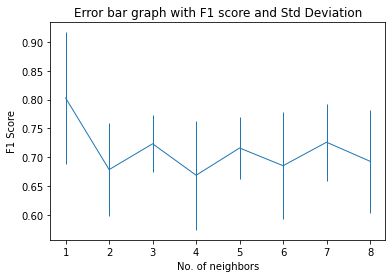

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#importing data from csv file
df = input_data
X_Train = np.array(df.loc[:, df.columns != 'target'])
Z=np.array(df.iloc[:,-1])

#values of N neighbours
N = [1,2,3,4,5,6,7,8]

kf = KFold(n_splits=5)
mean_error=[]; std_error=[];
for i in N:
    temp_score=[];
    for train, test in kf.split(X_Train):
      model = KNeighborsClassifier(n_neighbors=i,weights='uniform').fit(X_Train[train], Z[train])
      ypred = model.predict(X_Train[test])
      scores = cross_val_score(model, X_Train, Z, cv=5, scoring='f1')
      temp_score.append(np.array(scores))
    mean_error.append(np.array(temp_score).mean())
    std_error.append(np.array(temp_score).std())
    print("N=",i," Mean F1=%.3f"%np.array(temp_score).mean()," Std=%.3f"%np.array(temp_score).std())

#plotting graph for mean square error and standard deviation    
plt.errorbar(N,mean_error,yerr=std_error,linewidth=1)
plt.xlabel('No. of neighbors'); plt.ylabel('F1 Score')
plt.title("Error bar graph with F1 score and Std Deviation")
plt.show()


In [ ]:

from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

model = LinearSVC(C=0.2).fit(Xtrain, ytrain)


preds = model.predict(Xtest)
acc = accuracy_score(ytest, preds)
scores = cross_val_score(model, X_Train, Z, cv=5, scoring='f1')
print(acc)
print(scores.mean())


0.792016806722689
0.6625697501337158


C= 0.001  Pol= 1  Mean= 0.738  and STD= 0.058
C= 0.01  Pol= 1  Mean= 0.795  and STD= 0.040
C= 0.1  Pol= 1  Mean= 0.816  and STD= 0.043
C= 1  Pol= 1  Mean= 0.813  and STD= 0.050
C= 10  Pol= 1  Mean= 0.815  and STD= 0.049
C= 15  Pol= 1  Mean= 0.815  and STD= 0.050
C= 20  Pol= 1  Mean= 0.814  and STD= 0.051
C= 30  Pol= 1  Mean= 0.814  and STD= 0.050
C= 40  Pol= 1  Mean= 0.813  and STD= 0.051
C= 50  Pol= 1  Mean= 0.811  and STD= 0.050
C= 0.001  Pol= 2  Mean= 0.814  and STD= 0.052
C= 0.01  Pol= 2  Mean= 0.812  and STD= 0.049
C= 0.1  Pol= 2  Mean= 0.819  and STD= 0.046
C= 1  Pol= 2  Mean= 0.814  and STD= 0.052
C= 10  Pol= 2  Mean= 0.814  and STD= 0.042
C= 15  Pol= 2  Mean= 0.814  and STD= 0.047
C= 20  Pol= 2  Mean= 0.817  and STD= 0.046
C= 30  Pol= 2  Mean= 0.817  and STD= 0.047
C= 40  Pol= 2  Mean= 0.808  and STD= 0.049
C= 50  Pol= 2  Mean= 0.818  and STD= 0.046
C= 0.001  Pol= 3  Mean= 0.808  and STD= 0.041
C= 0.01  Pol= 3  Mean= 0.808  and STD= 0.043
C= 0.1  Pol= 3  Mean= 0.805  and STD= 0

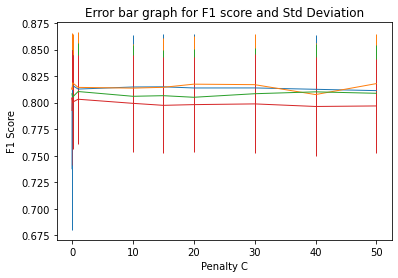

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

#importing data from csv file
df = pd.read_csv("/content/heart_statlog_cleveland_hungary_final.csv")

X_Train = np.array(df.loc[:, df.columns != 'target'])
Z=np.array(df.iloc[:,-1])


kf = KFold(n_splits=5)
C = [0.001, 0.01, 0.1, 1, 10, 15, 20, 30, 40, 50]
poly_val = [1,2,3,4]

for q in poly_val:
    temp_poly = [];
    mean_error=[]; std_error=[];
    X_poly_calc = PolynomialFeatures(q).fit_transform(X_Train)
    #looping for graphs at different values of C
    for x in C:
        temp_score=[];
        temp_std=[];
        #applying 5 k-fold cross validation method
        for train, test in kf.split(X_poly_calc):
            model = LogisticRegression(penalty='l2', C=x)
            model.fit(X_poly_calc[train], Z[train])
            Z_pred = model.predict(X_poly_calc[test])
            scores = cross_val_score(model, X_poly_calc, Z, cv=5, scoring='f1')
            temp_score.append(np.array(scores))
        mean_error.append(np.array(temp_score).mean())
        std_error.append(np.array(temp_score).std())
        print('C=',x,' Pol=',q," Mean= %.3f"%np.array(temp_score).mean() , " and STD= %.3f"%np.array(temp_score).std())
        
    #plotting graph for mean square error and standard deviation    
    #plt.legend(title=('Poly Feature = %f' % q ))
    plt.errorbar(C,mean_error,yerr=std_error,linewidth=1, label='Poly Features %0.0f'%q)
    plt.xlabel('Penalty C'); plt.ylabel('F1 Score')
    plt.title("Error bar graph for F1 score and Std Deviation")
plt.show()    
    
